In [16]:
import os
os.getcwd()
pt=(os.getcwd()+'\\'+'leaf0.jpg')
print(pt)

D:\code\opencv\leaf0.jpg


In [20]:
import cv2
  
im = cv2.imread('2.jpg')
if im is None:
    print("图像为空")

图像为空


出现了一个问题：写一个装饰器画三通道直方图，发现画一个通道是可以的，但是画三个就不允许了。指在一张图中绘制多条曲线，相同坐标轴。

# 下面一块是写的程序

In [2]:
import time, timeit
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
import pandas as pd
def clock(func):
    def clocked(*args):
        t0 = timeit.default_timer()
        result = func(*args)
        elapsed = timeit.default_timer() - t0
        name = func.__name__
        arg_str = ', '.join(repr(arg) for arg in args)
        print('[%0.8fs] %s(%s) -> %r' % (elapsed, name, arg_str, result))
        return result
    return clocked
def whole_hist(func):
    def whole_histed(*args):
        '''
        绘制整幅图像的直方图
        '''
        image=func(*args)
        plt.hist(image.ravel(), 256, [0, 256]) #numpy的ravel函数功能是将多维数组降为一维数组
        plt.show()
        return image
    return whole_histed
def show_img(func):
    def show_image(*args):
        image=func(*args)

        cv2.imshow('dst',image)
        if cv2.waitKey(0) & 0xff == 27:
            cv2.destroyAllWindows()
        return image
    return show_image
# def channel_hist(func):
#     def channel_histed(*args,**dicts):
#         '''
#         画三通道图像的直方图,出现了一个问题：写一个装饰器画三通道直方图，发现画一个通道是可以的，但是画三个就不允许了。指在一张图中绘制多条曲线，相同坐标轴。
#         '''
#         image=func(*args)
#         #print(image)
#         color = ('b', 'g', 'r')   #这里画笔颜色的值可以为大写或小写或只写首字母或大小写混合
#         hist=[1,2,3,4]
#         #for i1 , color1 in enumerate(color):
#         for i1 in range(3):
#             #enumerate()将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
#             hist[i1] = cv2.calcHist([image], [i1], None, [256], [0, 256])  #计算直方图
#             #plt.plot(hist, color1)
# # 创建figure对象
#             fig = plt.figure() # 每调用一次plt.figure()函数就会创建一个新的显示窗口，与matlab中的figure类似
#             subplot = fig.add_subplot(2, 3, 1) # 2表示2行，3表示3列，1表示2行3列中的索引位置1
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[0])

#             subplot = fig.add_subplot(2, 3, 3) # 2表示2行，3表示3列，1表示2行3列中的索引位置3
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[1])

#             subplot = fig.add_subplot(2, 3, 6) # 2表示2行，3表示3列，1表示2行3列中的索引位置6
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[2])
#         return image
#     return channel_histed
 
class CvImage():
    def __init__(self,img_name,read_method=1,gray_method=3,fx=0.3,fy=0.3,num=1,gray_level=16):
        self.img_name=img_name
        self.read_method=read_method
        self.gray_method=gray_method
        self.fx=fx
        self.fy=fy
        self.img=self.load_image()
        self.ju=["ju1","ju2","ju3","ju4","ju5","ju6","ju7",'huidu1','huidu2','huidu3','huidu4','yanse1','yanse2','yanse3','yanse4','yanse5','yanse6','yanse7','yanse8','yanse9']#将列表a，b转换成字典
        self.data=pd.DataFrame(columns=self.ju)
        self.num=num
        self.gray_level=gray_level
        #self.ju={"ju1" : [],"ju2" :  [],"ju3" :  [],"ju4" :  [],"ju5" : [],"ju6" :  [],"ju7" :  []}#将列表a，b转换成字典
        #self.data=pd.DataFrame(ju)
    def load_image(self):
        pt=(os.getcwd()+'\\'+self.img_name)
#         print(pt)
        img = cv2.imread(pt,self.read_method)
        if img is None:
            raise Exception("Image is not found!", img)
        return img
    def image_to_gray1(self):
        img=self.img
        grayimg = np.zeros(img.shape, np.uint8)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                grayimg[i,j] = max(image[i,j][0], image[i,j][1], image[i,j][2])
        return grayimg
    def image_to_gray2(self):
        image=self.img
        #最大值法
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                grayimg[i, j] = (int(image[i, j][0]) + int(image[i, j][1]) + int(image[i, j][2])) / 3
        return grayimg
    def image_to_gray3(self):
        image=self.img
        #最大值法
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                # Y = 0．3R + 0．59G + 0．11B
                # 通过cv格式打开的图片，像素格式为 BGR
                grayimg[i, j] = 0.3 * image[i, j][2] + 0.11 * image[i, j][0] + 0.59 * image[i, j][1]
        return grayimg
#     @whole_hist
#     @show_img
    def image_to_gray(self):
        if self.gray_method in range(1,4):
            if self.gray_method==1:
                return self.image_to_gray1()
            elif self.gray_method==2:
                return self.image_to_gray2()
            elif self.gray_method==3:
                return self.image_to_gray2()
        else :
            raise Exception("Gray_method is not in 1,2,3!", gray_method)
    @show_img
    def zhifangtu_junhen(self):
        img=self.image_to_gray()
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        cl1 = clahe.apply(img)
#         cv2.imwrite('zhifangtu_junhen.jpg',cl1)
        return cl1

    def zhongzhi_lvbo(self):
        img=self.zhifangtu_junhen()
        img = cv2.medianBlur(img,5)
#         cv2.imwrite('zhongzhi_lvbo.jpg',img)
        return img
#     @staticmethod
#     def show_image(img):
#         cv2.imshow('dst',img)
#         if cv2.waitKey(0) & 0xff == 27:
#             cv2.destroyAllWindows()

    def xiugai_chicun(self):
        image = cv2.resize(self.img, dsize=None, fx=self.fx, fy=self.fy, interpolation = cv2.INTER_AREA)
        return image
#     @show_img
    def quchu_beijing(self):
#         gray=self.zhongzhi_lvbo()
#         fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()
#         fgmask = fgbg.apply(gray)
#         return gray
        img=self.xiugai_chicun()
        HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]
        lower_gray = np.array([1, 0,0])
        upper_gray = np.array([99,255,255])#这就是双阈值
        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        res2 = cv2.bitwise_and(img,img, mask= mask)#和模板进行与运算
        cv2.imwrite("res2.jpg",res2)
        return res2
#     @show_img
    def bianyuan_chuli(self):
        res2=self.quchu_beijing()
        ret1, thresh1 = cv2.threshold(res2,0, 255, cv2.THRESH_BINARY)
        cv2.imwrite("mask.jpg",thresh1)
        kernel = np.ones((10, 10), np.uint8)    # 矩形结构

        erosion = cv2.erode(thresh1, kernel)   # 腐蚀
        dilation = cv2.dilate(thresh1, kernel) # 膨胀


        kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
        opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel_1)

        closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel_1)
        cv2.imwrite("biyunsuan.jpg",closing)
        (B,G,R) = cv2.split(image)
        mask=cv2.cvtColor(closing,cv2.COLOR_BGR2GRAY)

        and_img_B = cv2.bitwise_and(B,mask)
        and_img_G = cv2.bitwise_and(G,mask)
        and_img_R = cv2.bitwise_and(R,mask)
        zeros = np.zeros(res2.shape[:2], np.uint8)

        img_RGB = cv2.merge([and_img_R,and_img_G,and_img_B])
        cv2.imwrite("not_bad_segemation.jpg",img_RGB)
        img_BGR=cv2.cvtColor(img_RGB,cv2.COLOR_RGB2BGR) #这个颜色空间转来转去的，要小心
        HSV_img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]


        lower_gray = np.array([1, 0,0])
        upper_gray = np.array([99,255,255])


        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        result = cv2.bitwise_and(img_BGR,img_BGR, mask= mask)
        self.img=result
        return result
    def luokuo_fenge(self):
        gray=self.zhongzhi_lvbo()
        #gray=cv2.imread('zhongzhi_lvbo.jpg',0)
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray,2,3,0.04)
        dst = cv2.dilate(dst,None)
        ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
        dst = np.uint8(dst)
        # find centroids
        #connectedComponentsWithStats(InputArray image, OutputArray labels, OutputArray stats,
        #OutputArray centroids, int connectivity=8, int ltype=CV_32S)
        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
        # define the criteria to stop and refine the corners
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        #Python: cv2.cornerSubPix(image, corners, winSize, zeroZone, criteria)
        #zeroZone – Half of the size of the dead region in the middle of the search zone
        #over which the summation in the formula below is not done. It is used sometimes
        # to avoid possible singularities of the autocorrelation matrix. The value of (-1,-1)
        # indicates that there is no such a size.
        # 返回值由角点坐标组成的一个数组（而非图像）
        corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
        # Now draw them
        res = np.hstack((centroids,corners))
        #np.int0 可以用来省略小数点后面的数字（非四㮼五入）。
        res = np.int0(res)
        img[res[:,1],res[:,0]]=[0,0,255]
        img[res[:,3],res[:,2]] = [0,255,0]
        cv2.imwrite('subpixel5.png',img)
        return img
    def bubianju(self):
        seg = self.bianyuan_chuli()
        seg_gray = cv2.cvtColor(seg,cv2.COLOR_BGR2GRAY)
        moments = cv2.moments(seg_gray)
        humoments = cv2.HuMoments(moments)
        humoments = np.log(np.abs(humoments)) # 同样建议取对数
#         self.data.loc[self.num]=humoments.ravel()
#         self.num=self.num+1
#         print(humoments)
        #print(self.data)
        return humoments.ravel()
    def maxGrayLevel(self):
        img=cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        max_gray_level=0
        (height,width)=img.shape
        print(height,width)
        for y in range(height):
            for x in range(width):
                if img[y][x] > max_gray_level:
                    max_gray_level = img[y][x]
        return max_gray_level+1
    def getGlcm(self,input,d_x,d_y):
        srcdata=input.copy()
        ret=[[0.0 for i in range(self.gray_level)] for j in range(self.gray_level)]
        (height,width) = input.shape

        max_gray_level=self.maxGrayLevel()

        #若灰度级数大于gray_level，则将图像的灰度级缩小至gray_level，减小灰度共生矩阵的大小
        if max_gray_level > self.gray_level:
            for j in range(height):
                for i in range(width):
                    srcdata[j][i] = srcdata[j][i]*self.gray_level / max_gray_level

        for j in range(height-d_y):
            for i in range(width-d_x):
                rows = srcdata[j][i]
                cols = srcdata[j + d_y][i+d_x]
                ret[rows][cols]+=1.0

        for i in range(self.gray_level):
            for j in range(self.gray_level):
                ret[i][j]/=float(height*width)

        return ret
    def feature_computer(self,p):
        Con=0.0
        Eng=0.0
        Asm=0.0
        Idm=0.0
        for i in range(self.gray_level):
            for j in range(self.gray_level):
                Con+=(i-j)*(i-j)*p[i][j]
                Asm+=p[i][j]*p[i][j]
                Idm+=p[i][j]/(1+(i-j)*(i-j))
                if p[i][j]>0.0:
                    Eng+=p[i][j]*math.log(p[i][j])
        #print(Asm,Con,-Eng,Idm)
        return [Asm,Con,-Eng,Idm]
    def test(self):
#         img = cv2.imread(image_name)
#         try:
#             img_shape=img.shape
#         except:
#             print ('imread error')
#             return

#         img=cv2.resize(img,(int(img_shape[1]/2),int(img_shape[0]/2)),interpolation=cv2.INTER_CUBIC)

        img_gray=cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)

        glcm_0=self.getGlcm(img_gray, 1,0)
        #glcm_1=getGlcm(src_gray, 0,1)
        #glcm_2=getGlcm(src_gray, 1,1)
        #glcm_3=getGlcm(src_gray, -1,1)

        asm,con,eng,idm=self.feature_computer(glcm_0)

        return [asm,con,eng,idm]
    def color_moments(self):
        # Convert BGR to HSV colorspace
        hsv = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        # Split the channels - h,s,v
        h, s, v = cv2.split(hsv)
        # Initialize the color feature
        color_feature = []
        # N = h.shape[0] * h.shape[1]
        # The first central moment - average 
        h_mean = np.mean(h)  # np.sum(h)/float(N)
        s_mean = np.mean(s)  # np.sum(s)/float(N)
        v_mean = np.mean(v)  # np.sum(v)/float(N)
        color_feature.extend([h_mean, s_mean, v_mean])
        # The second central moment - standard deviation
        h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
        s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
        v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
        color_feature.extend([h_std, s_std, v_std])
        # The third central moment - the third root of the skewness
        h_skewness = np.mean(abs(h - h.mean())**3)
        s_skewness = np.mean(abs(s - s.mean())**3)
        v_skewness = np.mean(abs(v - v.mean())**3)
        h_thirdMoment = h_skewness**(1./3)
        s_thirdMoment = s_skewness**(1./3)
        v_thirdMoment = v_skewness**(1./3)
        color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment])
        return color_feature
    def tiqu(self):
        res=list(self.bubianju())
        res.extend(self.test())
        res.extend(self.color_moments())
        self.data.loc[self.num]=res
        self.num=self.num+1
        return self.data
    def zhuan_csv(self):
        self.data.to_csv('res.csv',encoding='gbk')
        return self.data
    @staticmethod
    def image_chazhi(*args,**dicts):
        '''
        在图像经过空间位置变换之后，需要求取在新平面的新排列的各点像素的位置，其并不会改变映射前后的像素的像素值。
        '''
        pass

if __name__ == '__main__':
#    run(1)
    img0=CvImage('leaf0.jpg',1,3)
    img1=img0.tiqu()
    img0.zhuan_csv()

NameError: name 'image' is not defined

In [47]:
import pandas as pd
ju=["ju1","ju2","ju3","ju4","ju5","ju6","ju7"]#将列表a，b转换成字典
data=pd.DataFrame(columns=ju)
a=[1,2,3,4,5,6,7]#包含两个不同的子列表[1,2,3,4]和[5,6,7,8]
data.loc[0]=a
print(data)
# data.append(a)#这时候是以行为标准写入的
# df2 = pd.DataFrame(a, columns=ju)
# tmp=dict(zip(ju,a))
# print(tmp)
# # data.append(dict(zip(ju,a)), ignore_index=True)
# # print(df2)
# # print(data)

  ju1 ju2 ju3 ju4 ju5 ju6 ju7
0   1   2   3   4   5   6   7


In [ ]:

import pandas as pd
import re
import math
dframe1 = pd.read_excel("window regulator分析报告数据对比源.xlsx", sheetname="Sheet1") #读取数据
dframe2 = pd.read_excel("window regulator分析报告数据对比源.xlsx", sheetname="Sheet2")#
dframe1["sku"] ="#" #添加一列数据，初始化为#
 
df = pd.DataFrame(columns = ["ebayno", "p_sku", "sale", "sku"]) #创建一个空的dataframe
# print(df)
sku = dframe2.sku.values
p_skus = dframe2.p_sku.values
# print(p_skus)
i = 0
for ps in p_skus :
    dframe1.loc[dframe1.p_sku == ps,"sku"] = sku[i]
 
    # print(dframe1.loc[dframe1.p_sku == ps])
    df = df.append(dframe1.loc[dframe1.p_sku == ps], ignore_index=True)  #忽略索引,往dataframe中插入一行数据
    # print(df)
    i = i + 1
# print(dframe1)
# print(sku.values) #将series变成数组
print(df)
df = df[["sku","ebayno","sale"]] #选取指定的列
df.to_csv("std.csv",encoding="gbk",index=False ) #写入到csv时，不要将索引写入index = False


In [35]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
# 合并  ignore_index设置为 True可以重新排列索引
df.append(df2, ignore_index=True)
#    A  B
# 0  1  2
# 1  3  4
# 2  5  6
# 3  7  8

,A,B
0,1,2
1,3,4
2,5,6
3,7,8


In [31]:
data

,ju1,ju2,ju3,ju4,ju5,ju6,ju7


In [27]:
df = pd.DataFrame(columns=['A'])
for i in range(5):
    df = df.append({'A': i}, ignore_index=True)
df

,A
0,0
1,1
2,2
3,3
4,4


In [25]:
data

,ju1,ju2,ju3,ju4,ju5,ju6,ju7


In [15]:
import cv2
import numpy as np
img1 = cv2.imread('zhifangtu_junhen.jpg')
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print( t)

0.9587031


In [1]:
import cv2
cv2.__version__

'4.5.1'

pip install opencv-contrib-python那个背景分割才不报错

对移动前景的检测

In [12]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.bgsegm.createBackgroundSubtractorGMG()
while(1):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
    cv2.imshow('frame',fgmask)


    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()


分类模型(又称分类器，或诊断)将实例映射到特定类。ROC分析的是二元分类模型，也就是输出结果只有两种类别的模型，例如：(阳性/阴性) (有病/没病) (垃圾邮件/非垃圾邮件) (敌军/非敌军)。当讯号侦测(或变量测量)的结果是连续值时，类与类的边界必须用阈值来界定。举例来说，用血压值来检测一个人是否有高血压，测出的血压值是连续的实数（从0~200都有可能），以收缩压140／舒张压90为阈值，阈值以上便诊断为有高血压，阈值未满者诊断为无高血压。二元分类模型的个案预测有四种结局：

In [99]:
"""
Created on Sat Jan 23 11:31 2021
@author: xiaotingting
"""
import time, timeit
import math
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
import pandas as pd
def clock(func):
    def clocked(*args):
        t0 = timeit.default_timer()
        result = func(*args)
        elapsed = timeit.default_timer() - t0
        name = func.__name__
        arg_str = ', '.join(repr(arg) for arg in args)
        print('[%0.8fs] %s(%s) -> %r' % (elapsed, name, arg_str, result))
        return result
    return clocked
def whole_hist(func):
    def whole_histed(*args):
        '''
        绘制整幅图像的直方图
        '''
        image=func(*args)
        plt.hist(image.ravel(), 256, [0, 256]) #numpy的ravel函数功能是将多维数组降为一维数组
        plt.show()
        return image
    return whole_histed
def show_img(func):
    def show_image(*args):
        image=func(*args)

        cv2.imshow('dst',image)
        if cv2.waitKey(0) & 0xff == 27:
            cv2.destroyAllWindows()
        return image
    return show_image
# def channel_hist(func):
#     def channel_histed(*args,**dicts):
#         '''
#         画三通道图像的直方图,出现了一个问题：写一个装饰器画三通道直方图，发现画一个通道是可以的，但是画三个就不允许了。指在一张图中绘制多条曲线，相同坐标轴。
#         '''
#         image=func(*args)
#         #print(image)
#         color = ('b', 'g', 'r')   #这里画笔颜色的值可以为大写或小写或只写首字母或大小写混合
#         hist=[1,2,3,4]
#         #for i1 , color1 in enumerate(color):
#         for i1 in range(3):
#             #enumerate()将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
#             hist[i1] = cv2.calcHist([image], [i1], None, [256], [0, 256])  #计算直方图
#             #plt.plot(hist, color1)
# # 创建figure对象
#             fig = plt.figure() # 每调用一次plt.figure()函数就会创建一个新的显示窗口，与matlab中的figure类似
#             subplot = fig.add_subplot(2, 3, 1) # 2表示2行，3表示3列，1表示2行3列中的索引位置1
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[0])

#             subplot = fig.add_subplot(2, 3, 3) # 2表示2行，3表示3列，1表示2行3列中的索引位置3
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[1])

#             subplot = fig.add_subplot(2, 3, 6) # 2表示2行，3表示3列，1表示2行3列中的索引位置6
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[2])
#         return image
#     return channel_histed
 
class CvImage():
    def __init__(self,img_name,read_method=1,gray_method=3,fx=0.3,fy=0.3,num=1,gray_level=16):
        self.img_name=img_name
        self.read_method=read_method
        self.gray_method=gray_method
        self.fx=fx
        self.fy=fy
        self.img=self.load_image()
        self.ju=["ju1","ju2","ju3","ju4","ju5","ju6","ju7",'huidu1','huidu2','huidu3','huidu4','yanse1','yanse2','yanse3','yanse4','yanse5','yanse6','yanse7','yanse8','yanse9']#将列表a，b转换成字典
        self.data=pd.DataFrame(columns=self.ju)
        self.num=num
        self.gray_level=gray_level
    def __del__(self):
        print ("__del__")
    def load_image(self):
        pt=(os.getcwd()+'\\images\\'+self.img_name)
        img = cv2.imread(pt,self.read_method)
#         if img is None:
#             raise Exception("Image is not found!", pt)
#         return img
        return img
    def xiugai_chicun(self):
        img=self.img
        image = cv2.resize(img, dsize=None, fx=self.fx, fy=self.fy, interpolation = cv2.INTER_AREA)
        self.img=image
        return image
    def image_to_gray1(self):
        img=self.img
        grayimg = np.zeros(img.shape, np.uint8)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                grayimg[i,j] = max(image[i,j][0], image[i,j][1], image[i,j][2])
        return grayimg
    def image_to_gray2(self):
        image=self.img
        #最大值法
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                grayimg[i, j] = (int(image[i, j][0]) + int(image[i, j][1]) + int(image[i, j][2])) / 3
        return grayimg
    def image_to_gray3(self):
        image=self.img
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                # Y = 0．3R + 0．59G + 0．11B
                # 通过cv格式打开的图片，像素格式为 BGR
                grayimg[i, j] = 0.3 * image[i, j][2] + 0.11 * image[i, j][0] + 0.59 * image[i, j][1]
        return grayimg
#     @whole_hist
#     @show_img
    def zhongzhi_lvbo(self):
        img=self.img
        img = cv2.medianBlur(img,5)
        return img
    def image_to_gray(self):
        if self.gray_method in range(1,4):
            if self.gray_method==1:
                return self.image_to_gray1()
            elif self.gray_method==2:
                return self.image_to_gray2()
            elif self.gray_method==3:
                return self.image_to_gray2()
        else :
            raise Exception("Gray_method is not in 1,2,3!", gray_method)

    def zhifangtu_junhen(self):
        img=self.zhongzhi_lvbo()

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        cl1 = clahe.apply(img)
        return cl1
#     @show_img
    def quchu_beijing(self):
        img=self.zhongzhi_lvbo()#################3
        HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]
        lower_gray = np.array([1, 0,0])
        upper_gray = np.array([99,255,255])#这就是双阈值
        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        res2 = cv2.bitwise_and(img,img, mask= mask)#和模板进行与运算
        cv2.imwrite("res2.jpg",res2)
        self.img=res2
        return res2
#     @show_img
    def bianyuan_chuli(self):
        self.quchu_beijing()
        res2=cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        ret1, thresh1 = cv2.threshold(res2,0, 255, cv2.THRESH_BINARY)
        cv2.imwrite("mask.jpg",thresh1)
        kernel = np.ones((10, 10), np.uint8)    # 矩形结构

        erosion = cv2.erode(thresh1, kernel)   # 腐蚀
        dilation = cv2.dilate(thresh1, kernel) # 膨胀


        kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
        opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel_1)

        closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel_1)
        cv2.imwrite("biyunsuan.jpg",closing)
        (B,G,R) = cv2.split(self.img)
        mask=cv2.cvtColor(closing,cv2.COLOR_BGR2GRAY)
        and_img_B = cv2.bitwise_and(B,mask)
        and_img_G = cv2.bitwise_and(G,mask)
        and_img_R = cv2.bitwise_and(R,mask)
        zeros = np.zeros(res2.shape[:2], np.uint8)
#         img_RGB=cv2.bitwise_and(closing,self.img)
        img_RGB = cv2.merge([and_img_R,and_img_G,and_img_B])
        cv2.imwrite("not_bad_segemation.jpg",img_RGB)
        img_BGR=cv2.cvtColor(img_RGB,cv2.COLOR_RGB2BGR) #这个颜色空间转来转去的，要小心
        HSV_img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]


        lower_gray = np.array([1, 0,0])
        upper_gray = np.array([99,255,255])


        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        result = cv2.bitwise_and(img_BGR,img_BGR, mask= mask)
        self.img=result
        return result
    def luokuo_fenge(self):
        gray=self.zhongzhi_lvbo()
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray,2,3,0.04)
        dst = cv2.dilate(dst,None)
        ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
        dst = np.uint8(dst)
        # find centroids
        #connectedComponentsWithStats(InputArray image, OutputArray labels, OutputArray stats,
        #OutputArray centroids, int connectivity=8, int ltype=CV_32S)
        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
        # define the criteria to stop and refine the corners
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        #Python: cv2.cornerSubPix(image, corners, winSize, zeroZone, criteria)
        #zeroZone – Half of the size of the dead region in the middle of the search zone
        #over which the summation in the formula below is not done. It is used sometimes
        # to avoid possible singularities of the autocorrelation matrix. The value of (-1,-1)
        # indicates that there is no such a size.
        # 返回值由角点坐标组成的一个数组（而非图像）
        corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
        # Now draw them
        res = np.hstack((centroids,corners))
        #np.int0 可以用来省略小数点后面的数字（非四㮼五入）。
        res = np.int0(res)
        img[res[:,1],res[:,0]]=[0,0,255]
        img[res[:,3],res[:,2]] = [0,255,0]
        cv2.imwrite('subpixel5.png',img)
        return img
    @clock
    def bubianju(self):
        seg = self.bianyuan_chuli()
        seg_gray = cv2.cvtColor(seg,cv2.COLOR_BGR2GRAY)
        moments = cv2.moments(seg_gray)
        humoments = cv2.HuMoments(moments)
        humoments = np.log(np.abs(humoments)) # 同样建议取对数
        return humoments.ravel()
    def maxGrayLevel(self):
        img=cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        max_gray_level=0
        (height,width)=img.shape
        print(height,width)
        for y in range(height):
            for x in range(width):
                if img[y][x] > max_gray_level:
                    max_gray_level = img[y][x]
        return max_gray_level+1
    def getGlcm(self,input,d_x,d_y):
        srcdata=input.copy()
        ret=[[0.0 for i in range(self.gray_level)] for j in range(self.gray_level)]
        (height,width) = input.shape

        max_gray_level=self.maxGrayLevel()

        #若灰度级数大于gray_level，则将图像的灰度级缩小至gray_level，减小灰度共生矩阵的大小
        if max_gray_level > self.gray_level:
            for j in range(height):
                for i in range(width):
                    srcdata[j][i] = srcdata[j][i]*self.gray_level / max_gray_level

        for j in range(height-d_y):
            for i in range(width-d_x):
                rows = srcdata[j][i]
                cols = srcdata[j + d_y][i+d_x]
                ret[rows][cols]+=1.0

        for i in range(self.gray_level):
            for j in range(self.gray_level):
                ret[i][j]/=float(height*width)

        return ret
    def feature_computer(self,p):
        Con=0.0
        Eng=0.0
        Asm=0.0
        Idm=0.0
        for i in range(self.gray_level):
            for j in range(self.gray_level):
                Con+=(i-j)*(i-j)*p[i][j]
                Asm+=p[i][j]*p[i][j]
                Idm+=p[i][j]/(1+(i-j)*(i-j))
                if p[i][j]>0.0:
                    Eng+=p[i][j]*math.log(p[i][j])
        #print(Asm,Con,-Eng,Idm)
        return [Asm,Con,-Eng,Idm]
    def test(self):
        img_gray=cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)

        glcm_0=self.getGlcm(img_gray, 1,0)

        asm,con,eng,idm=self.feature_computer(glcm_0)

        return [asm,con,eng,idm]
    def color_moments(self):
        # Convert BGR to HSV colorspace
        hsv = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        # Split the channels - h,s,v
        h, s, v = cv2.split(hsv)
        # Initialize the color feature
        color_feature = []
        # N = h.shape[0] * h.shape[1]
        # The first central moment - average 
        h_mean = np.mean(h)  # np.sum(h)/float(N)
        s_mean = np.mean(s)  # np.sum(s)/float(N)
        v_mean = np.mean(v)  # np.sum(v)/float(N)
        color_feature.extend([h_mean, s_mean, v_mean])
        # The second central moment - standard deviation
        h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
        s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
        v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
        color_feature.extend([h_std, s_std, v_std])
        # The third central moment - the third root of the skewness
        h_skewness = np.mean(abs(h - h.mean())**3)
        s_skewness = np.mean(abs(s - s.mean())**3)
        v_skewness = np.mean(abs(v - v.mean())**3)
        h_thirdMoment = h_skewness**(1./3)
        s_thirdMoment = s_skewness**(1./3)
        v_thirdMoment = v_skewness**(1./3)
        color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment])
        return color_feature
    def tiqu(self):
        res=list(self.bubianju())
        res.extend(self.test())
        res.extend(self.color_moments())
        self.data.loc[self.num]=res
        self.num=self.num+1
        return res
    def zhuan_csv(self):
        self.data.to_csv('res.csv',encoding='gbk')
        return self.data
    def image_chazhi(*args,**dicts):
        '''
        在图像经过空间位置变换之后，需要求取在新平面的新排列的各点像素的位置，其并不会改变映射前后的像素的像素值。
        '''
        pass

    def duqu():
        res0=[]
        for i in range(10000):
            print(i)
            filename='IMG_{0:03d}.jpg'.format(i)
            print(filename)
            img0=CvImage(filename)
            if img0.load_image() is None:
                break
            res=img0.tiqu()
            res0.append(res)
        ju=["ju1","ju2","ju3","ju4","ju5","ju6","ju7",'huidu1','huidu2','huidu3','huidu4','yanse1','yanse2','yanse3','yanse4','yanse5','yanse6','yanse7','yanse8','yanse9']#将列表a，b转换成字典
        data=pd.DataFrame(res0,columns=ju)
        data.to_csv('res2.csv')   
if __name__ == '__main__':
        t0 = timeit.default_timer()
#         CvImage.tiqu
        img0=CvImage('IMG_000.jpg')
        img0.tiqu()
        del img0
        elapsed = timeit.default_timer() - t0
        print('%0.8fs' % (elapsed))


[1.51279230s] bubianju(<__main__.CvImage object at 0x000001F350AD5C48>) -> array([ -6.34415447, -15.5006959 , -25.75060719, -26.81113886,
       -57.22063377, -35.4965108 , -53.09214159])
3456 4608
__del__
75.57590160s


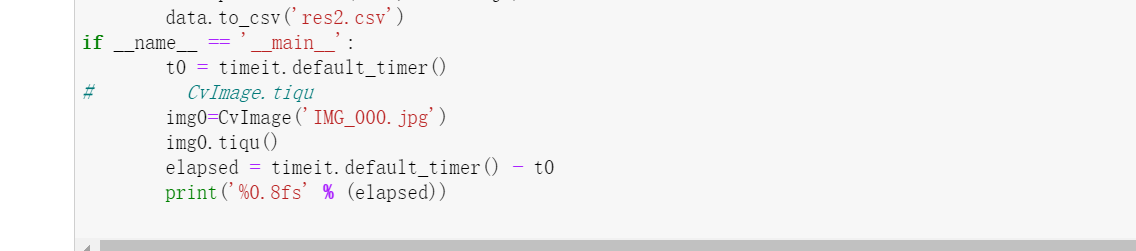

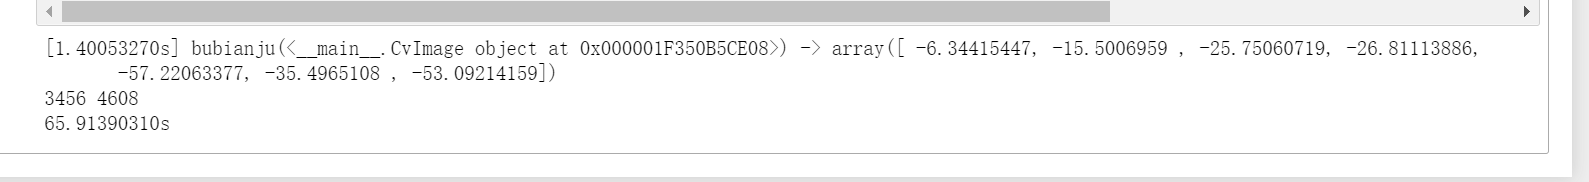

In [98]:
'''python对象销毁(垃圾回收)'''
  
class Point:
  'info class'
  def __init__(self,x=0,y=0):
    self.x = x
    self.y = y
  def __del__(self):
    class_name = self.__class__.__name__
    print(class_name, '销毁')
pt1 = Point()
pt2 = pt1
pt3 = pt2
print(id(pt1),id(pt2),id(pt3))
print(1)
del pt1
print(2)
del pt2
print(3)
del pt3

2144531794184 2144531794184 2144531794184
1
2
3
Point 销毁


In [108]:
"""
Created on Sat Jan 23 11:31 2021
@author: xiaotingting
"""
import time, timeit
import math
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
import pandas as pd
def clock(func):
    def clocked(*args):
        t0 = timeit.default_timer()
        result = func(*args)
        elapsed = timeit.default_timer() - t0
        name = func.__name__
        arg_str = ', '.join(repr(arg) for arg in args)
        print('[%0.8fs] %s(%s) -> %r' % (elapsed, name, arg_str, result))
        return result
    return clocked
def whole_hist(func):
    def whole_histed(*args):
        '''
        绘制整幅图像的直方图
        '''
        image=func(*args)
        plt.hist(image.ravel(), 256, [0, 256]) #numpy的ravel函数功能是将多维数组降为一维数组
        plt.show()
        return image
    return whole_histed
def show_img(func):
    def show_image(*args):
        image=func(*args)

        cv2.imshow('dst',image)
        if cv2.waitKey(0) & 0xff == 27:
            cv2.destroyAllWindows()
        return image
    return show_image
# def channel_hist(func):
#     def channel_histed(*args,**dicts):
#         '''
#         画三通道图像的直方图,出现了一个问题：写一个装饰器画三通道直方图，发现画一个通道是可以的，但是画三个就不允许了。指在一张图中绘制多条曲线，相同坐标轴。
#         '''
#         image=func(*args)
#         #print(image)
#         color = ('b', 'g', 'r')   #这里画笔颜色的值可以为大写或小写或只写首字母或大小写混合
#         hist=[1,2,3,4]
#         #for i1 , color1 in enumerate(color):
#         for i1 in range(3):
#             #enumerate()将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
#             hist[i1] = cv2.calcHist([image], [i1], None, [256], [0, 256])  #计算直方图
#             #plt.plot(hist, color1)
# # 创建figure对象
#             fig = plt.figure() # 每调用一次plt.figure()函数就会创建一个新的显示窗口，与matlab中的figure类似
#             subplot = fig.add_subplot(2, 3, 1) # 2表示2行，3表示3列，1表示2行3列中的索引位置1
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[0])

#             subplot = fig.add_subplot(2, 3, 3) # 2表示2行，3表示3列，1表示2行3列中的索引位置3
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[1])

#             subplot = fig.add_subplot(2, 3, 6) # 2表示2行，3表示3列，1表示2行3列中的索引位置6
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[2])
#         return image
#     return channel_histed
 
# class CvImage():
#     def __init__(self,img_name,read_method=1,gray_method=3,fx=0.3,fy=0.3,num=1,gray_level=16):
#         self.img_name=img_name
#         self.read_method=read_method
#         self.gray_method=gray_method
#         self.fx=fx
#         self.fy=fy
#         self.img=self.load_image()
#         self.ju=["ju1","ju2","ju3","ju4","ju5","ju6","ju7",'huidu1','huidu2','huidu3','huidu4','yanse1','yanse2','yanse3','yanse4','yanse5','yanse6','yanse7','yanse8','yanse9']#将列表a，b转换成字典
#         self.data=pd.DataFrame(columns=self.ju)
#         self.num=num
#         self.gray_level=gray_level
#     def __del__(self):
#         print ("__del__")
gray_level=16
@clock
def maxGrayLevel(img):
    max_gray_level=0
    (height,width)=img.shape
    print(height,width)
    for y in range(height):
        for x in range(width):
            if img[y][x] > max_gray_level:
                max_gray_level = img[y][x]
    return max_gray_level+1
@clock
def getGlcm(input,d_x,d_y):
    srcdata=input.copy()
    ret=[[0.0 for i in range(gray_level)] for j in range(gray_level)]
    (height,width) = input.shape
    
    max_gray_level=maxGrayLevel(input)
    
    #若灰度级数大于gray_level，则将图像的灰度级缩小至gray_level，减小灰度共生矩阵的大小
    if max_gray_level > gray_level:
        for j in range(height):
            for i in range(width):
                srcdata[j][i] = srcdata[j][i]*gray_level / max_gray_level

    for j in range(height-d_y):
        for i in range(width-d_x):
            rows = srcdata[j][i]
            cols = srcdata[j + d_y][i+d_x]
            ret[rows][cols]+=1.0

    for i in range(gray_level):
        for j in range(gray_level):
            ret[i][j]/=float(height*width)

    return ret
@clock
def feature_computer(p):
    Con=0.0
    Eng=0.0
    Asm=0.0
    Idm=0.0
    for i in range(gray_level):
        for j in range(gray_level):
            Con+=(i-j)*(i-j)*p[i][j]
            Asm+=p[i][j]*p[i][j]
            Idm+=p[i][j]/(1+(i-j)*(i-j))
            if p[i][j]>0.0:
                Eng+=p[i][j]*math.log(p[i][j])
    return Asm,Con,-Eng,Idm
@clock
def test(image_name):
    img = cv2.imread(image_name)
    try:
        img_shape=img.shape
    except:
        print ('imread error')
        return

    img=cv2.resize(img,(int(img_shape[1]/2),int(img_shape[0]/2)),interpolation=cv2.INTER_CUBIC)

    img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    glcm_0=getGlcm(img_gray, 1,0)
    #glcm_1=getGlcm(src_gray, 0,1)
    #glcm_2=getGlcm(src_gray, 1,1)
    #glcm_3=getGlcm(src_gray, -1,1)

    asm,con,eng,idm=feature_computer(glcm_0)

    return [asm,con,eng,idm]
@clock
def color_moments(self):
    # Convert BGR to HSV colorspace
    hsv = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
    # Split the channels - h,s,v
    h, s, v = cv2.split(hsv)
    # Initialize the color feature
    color_feature = []
    # N = h.shape[0] * h.shape[1]
    # The first central moment - average 
    h_mean = np.mean(h)  # np.sum(h)/float(N)
    s_mean = np.mean(s)  # np.sum(s)/float(N)
    v_mean = np.mean(v)  # np.sum(v)/float(N)
    color_feature.extend([h_mean, s_mean, v_mean])
    # The second central moment - standard deviation
    h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
    s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
    v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
    color_feature.extend([h_std, s_std, v_std])
    # The third central moment - the third root of the skewness
    h_skewness = np.mean(abs(h - h.mean())**3)
    s_skewness = np.mean(abs(s - s.mean())**3)
    v_skewness = np.mean(abs(v - v.mean())**3)
    h_thirdMoment = h_skewness**(1./3)
    s_thirdMoment = s_skewness**(1./3)
    v_thirdMoment = v_skewness**(1./3)
    color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment])
    return color_feature
def tiqu(img):
        pt=(os.getcwd()+'\\images\\'+img_name)
        img = cv2.imread(pt,self.read_method)
#         if img is None:
#             raise Exception("Image is not found!", pt)
#         return img
        img1=img
        img = cv2.medianBlur(img,5)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img = clahe.apply(img)
#         img=self.zhongzhi_lvbo()#################3
        HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]
        lower_gray = np.array([1, 0,0])
        upper_gray = np.array([99,255,255])#这就是双阈值
        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        res2 = cv2.bitwise_and(img,img, mask= mask)#和模板进行与运算
        cv2.imwrite("res2.jpg",res2)
        img=res2
        image = cv2.resize(img, dsize=None, fx=self.fx, fy=self.fy, interpolation = cv2.INTER_AREA)
#          self.quchu_beijing()
        res2=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        ret1, thresh1 = cv2.threshold(res2,0, 255, cv2.THRESH_BINARY)
#         cv2.imwrite("mask.jpg",thresh1)
        kernel = np.ones((10, 10), np.uint8)    # 矩形结构

        erosion = cv2.erode(thresh1, kernel)   # 腐蚀
        dilation = cv2.dilate(thresh1, kernel) # 膨胀


        kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
        opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel_1)

        closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel_1)
#         cv2.imwrite("biyunsuan.jpg",closing)
        (B,G,R) = cv2.split(img)
        mask=cv2.cvtColor(closing,cv2.COLOR_BGR2GRAY)
        and_img_B = cv2.bitwise_and(B,mask)
        and_img_G = cv2.bitwise_and(G,mask)
        and_img_R = cv2.bitwise_and(R,mask)
        zeros = np.zeros(res2.shape[:2], np.uint8)
#         img_RGB=cv2.bitwise_and(closing,self.img)
        img_RGB = cv2.merge([and_img_R,and_img_G,and_img_B])
        cv2.imwrite("not_bad_segemation.jpg",img_RGB)
        img_BGR=cv2.cvtColor(img_RGB,cv2.COLOR_RGB2BGR) #这个颜色空间转来转去的，要小心
        HSV_img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]


        lower_gray = np.array([1, 0,0])
        upper_gray = np.array([99,255,255])


        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        result = cv2.bitwise_and(img_BGR,img_BGR, mask= mask)
#     def image_to_gray1(self):
#         img=self.img
        grayimg = np.zeros(image.shape, np.uint8)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                grayimg[i,j] = max(image[i,j][0], image[i,j][1], image[i,j][2])
        img=grayimg
        seg =img
        seg_gray = cv2.cvtColor(seg,cv2.COLOR_BGR2GRAY)
        moments = cv2.moments(seg_gray)
        humoments = cv2.HuMoments(moments)
        humoments = np.log(np.abs(humoments)) # 同样建议取对数
        humoments=humoments.ravel()
        res=list(humoments)
        res.extend(self.test())
        res.extend(self.color_moments())
        return res
@clock
def duqu():
    res0=[]
    for i in range(1):
        print(i)
        filename='IMG_{0:03d}.jpg'.format(i)
        print(filename)
        img0=CvImage(filename)
        if img0.load_image() is None:
            break
        res=img0.tiqu()
        res0.append(res)
    ju=["ju1","ju2","ju3","ju4","ju5","ju6","ju7",'huidu1','huidu2','huidu3','huidu4','yanse1','yanse2','yanse3','yanse4','yanse5','yanse6','yanse7','yanse8','yanse9']#将列表a，b转换成字典
    data=pd.DataFrame(res0,columns=ju)
    data.to_csv('res2.csv')   
if __name__ == '__main__':
        t0 = timeit.default_timer()
#         CvImage.tiqu
#         img0=CvImage('IMG_000.jpg')
        duqu()
        elapsed = timeit.default_timer() - t0
        print('%0.8fs' % (elapsed))


0
IMG_000.jpg
[1.38728830s] bubianju(<__main__.CvImage object at 0x000001F3500A10C8>) -> array([ -6.34415447, -15.5006959 , -25.75060719, -26.81113886,
       -57.22063377, -35.4965108 , -53.09214159])
3456 4608
__del__
[68.05001610s] duqu() -> None
68.05016420s


是调用Del删除的

类比函数强在于其可扩展性.

函数比类好在于其速率在理论上快一些.

并且个人感觉函数的调用也没类那么麻烦.

Jupyter notebook没重启，所以设置没生效

jupyter notebook会有缓存影响，重新运行，不一定会 生效

pycharm修改即使不手动保存也是立刻生效的，可能是配置问题。

In [107]:
import cv2
res=cv2.imread('leaf0.jpg',1)
img = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    #         img=self.zhongzhi_lvbo()#################3
res1 = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.imshow('dist',res1)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

BGR和GRAY互转是无法显示成正常的颜色

In [3]:
"""
Created on Sat Jan 23 11:31 2021
@author: xiaotingting
"""
import time, timeit
import math
from matplotlib import pyplot as plt
import cv2
import numpy as np
import os
import pandas as pd

__all__=['CvImage']
def clock(func):
    def clocked(*args):
        t0 = timeit.default_timer()
        result = func(*args)
        elapsed = timeit.default_timer() - t0
        name = func.__name__
        arg_str = ', '.join(repr(arg) for arg in args)
        print('[%0.8fs] %s(%s) -> %r' % (elapsed, name, arg_str, result))
        return result

    return clocked


def whole_hist(func):
    def whole_histed(*args):
        '''
        绘制整幅图像的直方图
        '''
        image = func(*args)
        plt.hist(image.ravel(), 256, [0, 256])  # numpy的ravel函数功能是将多维数组降为一维数组
        plt.show()
        return image

    return whole_histed


def show_img(func):
    def show_image(*args):
        image = func(*args)

        cv2.imshow('dst', image)
        if cv2.waitKey(0) & 0xff == 27:
            cv2.destroyAllWindows()
        return image

    return show_image


# def channel_hist(func):
#     def channel_histed(*args,**dicts):
#         '''
#         画三通道图像的直方图,出现了一个问题：写一个装饰器画三通道直方图，发现画一个通道是可以的，但是画三个就不允许了。指在一张图中绘制多条曲线，相同坐标轴。
#         '''
#         image=func(*args)
#         #print(image)
#         color = ('b', 'g', 'r')   #这里画笔颜色的值可以为大写或小写或只写首字母或大小写混合
#         hist=[1,2,3,4]
#         #for i1 , color1 in enumerate(color):
#         for i1 in range(3):
#             #enumerate()将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
#             hist[i1] = cv2.calcHist([image], [i1], None, [256], [0, 256])  #计算直方图
#             #plt.plot(hist, color1)
# # 创建figure对象
#             fig = plt.figure() # 每调用一次plt.figure()函数就会创建一个新的显示窗口，与matlab中的figure类似
#             subplot = fig.add_subplot(2, 3, 1) # 2表示2行，3表示3列，1表示2行3列中的索引位置1
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[0])

#             subplot = fig.add_subplot(2, 3, 3) # 2表示2行，3表示3列，1表示2行3列中的索引位置3
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[1])

#             subplot = fig.add_subplot(2, 3, 6) # 2表示2行，3表示3列，1表示2行3列中的索引位置6
#             #subplot.xlim([0, 256])
#             subplot.imshow(hist[2])
#         return image
#     return channel_histed

class CvImage():
    def __init__(self, img_name, read_method=1, gray_method=3, fx=0.3, fy=0.3, num=1, gray_level=16):
        self.img_name = img_name
        self.read_method = read_method
        self.gray_method = gray_method
        self.fx = fx
        self.fy = fy
        self.img = self.load_image()
        self.ju = ["ju1", "ju2", "ju3", "ju4", "ju5", "ju6", "ju7", 'huidu1', 'huidu2', 'huidu3', 'huidu4', 'yanse1',
                   'yanse2', 'yanse3', 'yanse4', 'yanse5', 'yanse6', 'yanse7', 'yanse8', 'yanse9']  # 将列表a，b转换成字典
        self.data = pd.DataFrame(columns=self.ju)
        self.num = num
        self.gray_level = gray_level

    def load_image(self):
        pt = (os.getcwd() + '\\' + self.img_name)
        img = cv2.imread(pt, self.read_method)
        #         if img is None:
        #             raise Exception("Image is not found!", pt)
        #         return img
        return img

    def xiugai_chicun(self):
        img = self.img
        image = cv2.resize(img, dsize=None, fx=self.fx, fy=self.fy, interpolation=cv2.INTER_AREA)
        self.img = image
        return image

    def image_to_gray1(self):
        img = self.img
        grayimg = np.zeros(img.shape, np.uint8)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                grayimg[i, j] = max(image[i, j][0], image[i, j][1], image[i, j][2])
        return grayimg

    def image_to_gray2(self):
        image = self.img
        # 最大值法
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                grayimg[i, j] = (int(image[i, j][0]) + int(image[i, j][1]) + int(image[i, j][2])) / 3
        return grayimg

    def image_to_gray3(self):
        image = self.img
        h, w = image.shape[:2]
        grayimg = np.zeros((h, w), dtype=np.uint8)  # 创建一个h行w列的二维list
        for i in range(h):
            for j in range(w):
                # Y = 0．3R + 0．59G + 0．11B
                # 通过cv格式打开的图片，像素格式为 BGR
                grayimg[i, j] = 0.3 * image[i, j][2] + 0.11 * image[i, j][0] + 0.59 * image[i, j][1]
        return grayimg

    #     @whole_hist
    #     @show_img
    def zhongzhi_lvbo(self):
        img = self.img
        img = cv2.medianBlur(img, 5)
        return img

    def image_to_gray(self):
        if self.gray_method in range(1, 4):
            if self.gray_method == 1:
                return self.image_to_gray1()
            elif self.gray_method == 2:
                return self.image_to_gray2()
            elif self.gray_method == 3:
                return self.image_to_gray2()
        else:
            raise Exception("Gray_method is not in 1,2,3!", gray_method)
    @show_img
    def zhifangtu_junhen(self):
        img = self.zhongzhi_lvbo()

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        cl1 = clahe.apply(img)
        return cl1

    #     @show_img
    def quchu_beijing(self):
        img = self.zhongzhi_lvbo()  #################3
        HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]
        lower_gray = np.array([1, 0, 0])
        upper_gray = np.array([99, 255, 255])  # 这就是双阈值
        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        res2 = cv2.bitwise_and(img, img, mask=mask)  # 和模板进行与运算
        cv2.imwrite("res2.jpg", res2)
        self.img = res2
        return res2

    #     @show_img
    def bianyuan_chuli(self):
        self.quchu_beijing()
        res2 = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        ret1, thresh1 = cv2.threshold(res2, 0, 255, cv2.THRESH_BINARY)
        cv2.imwrite("mask.jpg", thresh1)
        kernel = np.ones((10, 10), np.uint8)  # 矩形结构

        erosion = cv2.erode(thresh1, kernel)  # 腐蚀
        dilation = cv2.dilate(thresh1, kernel)  # 膨胀

        kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
        opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel_1)

        closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel_1)
        cv2.imwrite("biyunsuan.jpg", closing)
        (B, G, R) = cv2.split(self.img)
        mask = cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)
        and_img_B = cv2.bitwise_and(B, mask)
        and_img_G = cv2.bitwise_and(G, mask)
        and_img_R = cv2.bitwise_and(R, mask)
        zeros = np.zeros(res2.shape[:2], np.uint8)
        #         img_RGB=cv2.bitwise_and(closing,self.img)
        img_RGB = cv2.merge([and_img_R, and_img_G, and_img_B])
        cv2.imwrite("not_bad_segemation.jpg", img_RGB)
        img_BGR = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2BGR)  # 这个颜色空间转来转去的，要小心
        HSV_img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
        hue = HSV_img[:, :, 0]

        lower_gray = np.array([1, 0, 0])
        upper_gray = np.array([99, 255, 255])

        mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
        # Bitwise-AND mask and original image
        result = cv2.bitwise_and(img_BGR, img_BGR, mask=mask)
        self.img = result
        return result

    def luokuo_fenge(self):
        gray = self.zhongzhi_lvbo()
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray, 2, 3, 0.04)
        dst = cv2.dilate(dst, None)
        ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
        dst = np.uint8(dst)
        # find centroids
        # connectedComponentsWithStats(InputArray image, OutputArray labels, OutputArray stats,
        # OutputArray centroids, int connectivity=8, int ltype=CV_32S)
        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
        # define the criteria to stop and refine the corners
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        # Python: cv2.cornerSubPix(image, corners, winSize, zeroZone, criteria)
        # zeroZone – Half of the size of the dead region in the middle of the search zone
        # over which the summation in the formula below is not done. It is used sometimes
        # to avoid possible singularities of the autocorrelation matrix. The value of (-1,-1)
        # indicates that there is no such a size.
        # 返回值由角点坐标组成的一个数组（而非图像）
        corners = cv2.cornerSubPix(gray, np.float32(centroids), (5, 5), (-1, -1), criteria)
        # Now draw them
        res = np.hstack((centroids, corners))
        # np.int0 可以用来省略小数点后面的数字（非四㮼五入）。
        res = np.int0(res)
        img[res[:, 1], res[:, 0]] = [0, 0, 255]
        img[res[:, 3], res[:, 2]] = [0, 255, 0]
        cv2.imwrite('subpixel5.png', img)
        return img

    def bubianju(self):
        seg = self.bianyuan_chuli()
        seg_gray = cv2.cvtColor(seg, cv2.COLOR_BGR2GRAY)
        moments = cv2.moments(seg_gray)
        humoments = cv2.HuMoments(moments)
        humoments = np.log(np.abs(humoments))  # 同样建议取对数
        return humoments.ravel()

    def maxGrayLevel(self):
        img = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)
        max_gray_level = 0
        (height, width) = img.shape
        print(height, width)
        for y in range(height):
            for x in range(width):
                if img[y][x] > max_gray_level:
                    max_gray_level = img[y][x]
        return max_gray_level + 1

    def getGlcm(self, input, d_x, d_y):
        srcdata = input.copy()
        ret = [[0.0 for i in range(self.gray_level)] for j in range(self.gray_level)]
        (height, width) = input.shape

        max_gray_level = self.maxGrayLevel()

        # 若灰度级数大于gray_level，则将图像的灰度级缩小至gray_level，减小灰度共生矩阵的大小
        if max_gray_level > self.gray_level:
            for j in range(height):
                for i in range(width):
                    srcdata[j][i] = srcdata[j][i] * self.gray_level / max_gray_level

        for j in range(height - d_y):
            for i in range(width - d_x):
                rows = srcdata[j][i]
                cols = srcdata[j + d_y][i + d_x]
                ret[rows][cols] += 1.0

        for i in range(self.gray_level):
            for j in range(self.gray_level):
                ret[i][j] /= float(height * width)

        return ret

    def feature_computer(self, p):
        Con = 0.0
        Eng = 0.0
        Asm = 0.0
        Idm = 0.0
        for i in range(self.gray_level):
            for j in range(self.gray_level):
                Con += (i - j) * (i - j) * p[i][j]
                Asm += p[i][j] * p[i][j]
                Idm += p[i][j] / (1 + (i - j) * (i - j))
                if p[i][j] > 0.0:
                    Eng += p[i][j] * math.log(p[i][j])
        # print(Asm,Con,-Eng,Idm)
        return [Asm, Con, -Eng, Idm]

    def test(self):
        img_gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)

        glcm_0 = self.getGlcm(img_gray, 1, 0)

        asm, con, eng, idm = self.feature_computer(glcm_0)

        return [asm, con, eng, idm]

    def color_moments(self):
        # Convert BGR to HSV colorspace
        hsv = cv2.cvtColor(self.img, cv2.COLOR_BGR2HSV)
        # Split the channels - h,s,v
        h, s, v = cv2.split(hsv)
        # Initialize the color feature
        color_feature = []
        # N = h.shape[0] * h.shape[1]
        # The first central moment - average
        h_mean = np.mean(h)  # np.sum(h)/float(N)
        s_mean = np.mean(s)  # np.sum(s)/float(N)
        v_mean = np.mean(v)  # np.sum(v)/float(N)
        color_feature.extend([h_mean, s_mean, v_mean])
        # The second central moment - standard deviation
        h_std = np.std(h)  # np.sqrt(np.mean(abs(h - h.mean())**2))
        s_std = np.std(s)  # np.sqrt(np.mean(abs(s - s.mean())**2))
        v_std = np.std(v)  # np.sqrt(np.mean(abs(v - v.mean())**2))
        color_feature.extend([h_std, s_std, v_std])
        # The third central moment - the third root of the skewness
        h_skewness = np.mean(abs(h - h.mean()) ** 3)
        s_skewness = np.mean(abs(s - s.mean()) ** 3)
        v_skewness = np.mean(abs(v - v.mean()) ** 3)
        h_thirdMoment = h_skewness ** (1. / 3)
        s_thirdMoment = s_skewness ** (1. / 3)
        v_thirdMoment = v_skewness ** (1. / 3)
        color_feature.extend([h_thirdMoment, s_thirdMoment, v_thirdMoment])
        return color_feature

    @property
    def tiqu(self):
        res = list(self.bubianju())
        res.extend(self.test())
        res.extend(self.color_moments())
        self.data.loc[self.num] = res
        self.num = self.num + 1
        return res

    @property
    def zhuan_csv(self):
        self.data.to_csv('res.csv', encoding='gbk')
        return self.data

    @staticmethod
    def image_chazhi(*args, **dicts):
        '''
        在图像经过空间位置变换之后，需要求取在新平面的新排列的各点像素的位置，其并不会改变映射前后的像素的像素值。
        '''
        pass

    @staticmethod
    def duqu():
        res0 = []
        for i in range(1):
            print(i)
            filename = 'IMG_{0:03d}.jpg'.format(i)
            print(filename)
            img0 = CvImage(filename)
            if img0.load_image() is None:
                break
            res = img0.tiqu
            res0.append(res)
        ju = ["ju1", "ju2", "ju3", "ju4", "ju5", "ju6", "ju7", 'huidu1', 'huidu2', 'huidu3', 'huidu4', 'yanse1',
              'yanse2', 'yanse3', 'yanse4', 'yanse5', 'yanse6', 'yanse7', 'yanse8', 'yanse9']  # 将列表a，b转换成字典
        data = pd.DataFrame(res0, columns=ju)
        data.to_csv('res.csv')
if __name__=='__main__':
    img0=CvImage('leaf0.jpg')
    img0.tiqu

600 800
